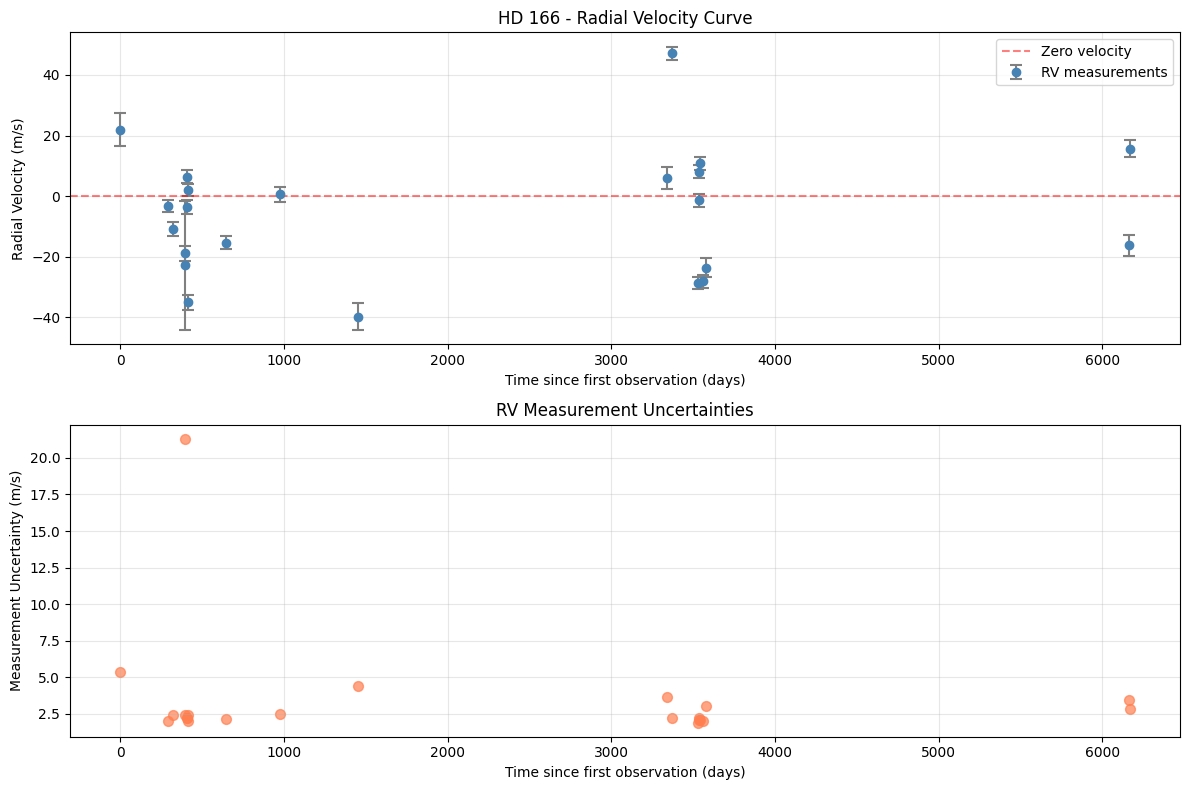

Star: Unknown
Number of observations: 22
RV range: -39.78 to 47.20 m/s
Mean RV uncertainty: 3.500 m/s
Observation span: 6167.1 days (16.88 years)


In [6]:
import astropy
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np

# Read the radial velocity file
rv_file = '/mnt/ssd/astro/exoplanet-detection/data/radvel/UID_0000544_RVC_002.tbl'
data = ascii.read(rv_file)

# Extract columns
hjd = data['HJD']
rv = data['Radial_Velocity']
rv_err = data['Radial_Velocity_Uncertainty']

# Convert HJD to days relative to first observation
hjd_relative = hjd - hjd[0]

# Create figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Plot 1: Radial Velocity vs Time
axes[0].errorbar(hjd_relative, rv, yerr=rv_err, fmt='o', markersize=6, 
                 capsize=4, capthick=1.5, color='steelblue', ecolor='gray', label='RV measurements')
axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Zero velocity')
axes[0].set_xlabel('Time since first observation (days)')
axes[0].set_ylabel('Radial Velocity (m/s)')
axes[0].set_title('HD 166 - Radial Velocity Curve')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Plot 2: Measurement Uncertainty over time
axes[1].scatter(hjd_relative, rv_err, color='coral', s=50, alpha=0.7)
axes[1].set_xlabel('Time since first observation (days)')
axes[1].set_ylabel('Measurement Uncertainty (m/s)')
axes[1].set_title('RV Measurement Uncertainties')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print data summary
print(f"Star: {data.meta.get('STAR_ID', 'Unknown')}")
print(f"Number of observations: {len(data)}")
print(f"RV range: {rv.min():.2f} to {rv.max():.2f} m/s")
print(f"Mean RV uncertainty: {rv_err.mean():.3f} m/s")
print(f"Observation span: {hjd_relative[-1]:.1f} days ({hjd_relative[-1]/365.25:.2f} years)")